In [1]:
# project: p6
# submitter: nphansen
# partner: goschmitz

import pandas as pd 
import numpy as np 
from zipfile import ZipFile
import matplotlib.pyplot as plt
import time, math

with ZipFile("dataset_diabetes.zip") as zf:
    df = pd.read_csv('diabetic_data.csv') #?? should this be read straight from csv instead? 

ids = df.loc[:,:'patient_nbr'] 
a = ids.values
    
train_idx = list()
test_idx = list()


In [2]:
a = a.astype(str)
x,y = a.T
cat = list(np.char.add(x,y))

for i in range(len(cat)):
    digit_sum = 0
    for c in cat[i]:
        digit_sum += int(c)
    if digit_sum & 1:
        test_idx.append(i)
    else:
        train_idx.append(i)

In [3]:
test = df.iloc[test_idx]
train = df.iloc[train_idx]

In [4]:
x = "2673"
y = "111"
x+y

'2673111'

In [5]:
#q1
train.shape, test.shape

((50803, 50), (50963, 50))

In [6]:
#q2
(
    train["time_in_hospital"].mean(),
    test["time_in_hospital"].mean(),
    train["time_in_hospital"].std(), 
    test["time_in_hospital"].std(),
)

(4.401295199102416, 4.390695210250574, 2.984025665505041, 2.9862059667206435)

In [7]:
#q3
{
    "train": dict(train["readmitted"].value_counts()),
    "test": dict(test["readmitted"].value_counts()),
}

{'train': {'NO': 27360, '>30': 17770, '<30': 5673},
 'test': {'NO': 27504, '>30': 17775, '<30': 5684}}

In [8]:
train

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),?,2,1,2,3,...,No,Steady,No,No,No,No,No,No,Yes,>30
8,12522,48330783,Caucasian,Female,[80-90),?,2,1,4,13,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101760,443847176,50375628,AfricanAmerican,Female,[60-70),?,1,1,7,6,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [9]:
#q4
cols = train.columns
missing = {}

for col in cols:
    percents = train[col].value_counts(normalize=True)
    if '?' in percents:
        missing[col] = percents['?']*100

missing

{'race': 2.2104993799578763,
 'weight': 96.80924354860933,
 'payer_code': 39.25949254965258,
 'medical_specialty': 49.180166525598885,
 'diag_1': 0.023620652323681674,
 'diag_2': 0.3444678463870244,
 'diag_3': 1.3955868747908586}

In [10]:
#q5
adm = train['admission_source_id'].values
dis = train['discharge_disposition_id'].values

pd.options.display.max_columns = 30
pd.options.display.max_rows = 30
q5 = pd.crosstab(adm,dis)
q5

col_0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,22,23,24,25,27,28
row_0,,,,,,,,,,,,,,,,,,,,,,,,,,
1,9356,204,1526,79,145,2029,45,19,4,1,117,1,48,32,21,0,0,473,0,1,367,76,2,133,0,27
2,319,3,30,8,9,87,1,6,0,0,11,0,1,0,0,0,0,52,0,0,13,2,1,0,0,2
3,27,2,5,0,2,21,0,0,0,0,1,0,0,0,0,0,0,41,0,0,1,0,0,0,0,0
4,843,49,87,11,28,258,3,5,0,0,23,0,4,2,0,0,0,229,0,0,21,5,0,5,0,1
5,20,4,277,5,7,25,0,0,0,0,20,0,3,2,0,0,0,58,0,0,4,6,0,1,1,0
6,730,17,189,64,44,23,6,0,0,0,8,0,1,0,0,0,0,12,0,0,10,3,0,0,0,0
7,17042,685,4128,250,311,3402,235,22,7,1,566,0,144,100,6,0,0,970,4,0,558,101,16,154,1,34
8,5,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,43,1,4,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0


In [11]:
#q6
with ZipFile("dataset_diabetes.zip") as zf:
    mp = pd.read_csv('IDs_mapping.csv')

pd.options.display.max_rows = 70

mp

,admission_type_id,description
0,1,Emergency
1,2,Urgent
2,3,Elective
3,4,Newborn
4,5,Not Available
5,6,NaN
6,7,Trauma Center
7,8,Not Mapped
8,NaN,NaN
9,discharge_disposition_id,description


In [12]:
cp = mp.values
ati = cp.copy()[0:8]
ddi = cp.copy()[10:40]
asi = cp.copy()[42:]

In [13]:
ati = dict(ati)
ati = {int(k):str(v) for k,v in ati.items()}

In [14]:
ddi = dict(ddi)
ddi = {int(k):str(v) for k,v in ddi.items()}

In [15]:
asi = dict(asi)
asi = {int(k):str(v) for k,v in asi.items()}

In [16]:
#q6
q5 = q5.rename(columns=ddi,index=asi)
q5

col_0,Discharged to home,Discharged/transferred to another short term hospital,Discharged/transferred to SNF,Discharged/transferred to ICF,Discharged/transferred to another type of inpatient care institution,Discharged/transferred to home with home health service,Left AMA,Discharged/transferred to home under care of Home IV provider,Admitted as an inpatient to this hospital,Neonate discharged to another hospital for neonatal aftercare,Expired,Still patient or expected to return for outpatient services,Hospice / home,Hospice / medical facility,Discharged/transferred within this institution to Medicare approved swing bed,Discharged/transferred/referred another institution for outpatient services,Discharged/transferred/referred to this institution for outpatient services,nan,"Expired at home. Medicaid only, hospice.","Expired in a medical facility. Medicaid only, hospice.",Discharged/transferred to another rehab fac including rehab units of a hospital .,Discharged/transferred to a long term care hospital.,Discharged/transferred to a nursing facility certified under Medicaid but not certified under Medicare.,Not Mapped,Discharged/transferred to a federal health care facility.,Discharged/transferred/referred to a psychiatric hospital of psychiatric distinct part unit of a hospital
row_0,,,,,,,,,,,,,,,,,,,,,,,,,,
Physician Referral,9356,204,1526,79,145,2029,45,19,4,1,117,1,48,32,21,0,0,473,0,1,367,76,2,133,0,27
Clinic Referral,319,3,30,8,9,87,1,6,0,0,11,0,1,0,0,0,0,52,0,0,13,2,1,0,0,2
HMO Referral,27,2,5,0,2,21,0,0,0,0,1,0,0,0,0,0,0,41,0,0,1,0,0,0,0,0
Transfer from a hospital,843,49,87,11,28,258,3,5,0,0,23,0,4,2,0,0,0,229,0,0,21,5,0,5,0,1
Transfer from a Skilled Nursing Facility (SNF),20,4,277,5,7,25,0,0,0,0,20,0,3,2,0,0,0,58,0,0,4,6,0,1,1,0
Transfer from another health care facility,730,17,189,64,44,23,6,0,0,0,8,0,1,0,0,0,0,12,0,0,10,3,0,0,0,0
Emergency Room,17042,685,4128,250,311,3402,235,22,7,1,566,0,144,100,6,0,0,970,4,0,558,101,16,154,1,34
Court/Law Enforcement,5,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Not Available,43,1,4,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0


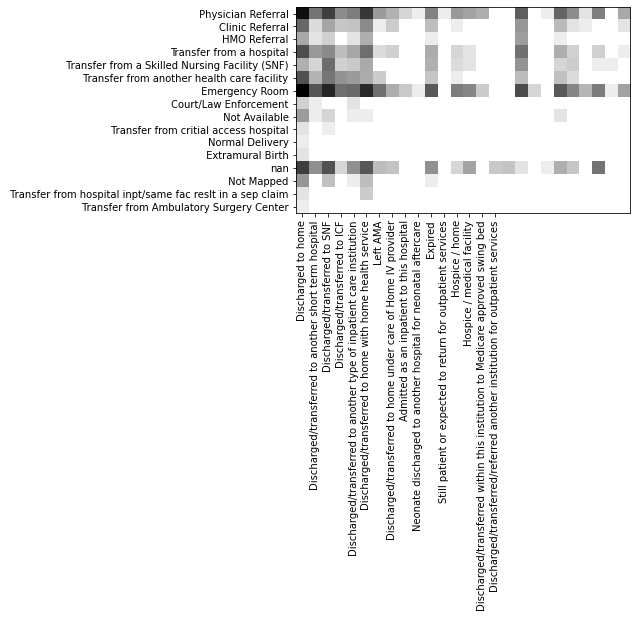

In [17]:
#q7
numeric_cols = [col for col in q5 if q5[col].dtype.kind != 'O']
q5[numeric_cols] += 1
q5 = np.log2(q5)
plt.imshow(q5, cmap = "binary")
plt.xticks(range(len(q5)),q5.columns, rotation=90)
plt.yticks(range(len(q5)),q5.index)
plt.show()
